# Aula 3 - Visualização de Dados

In [1]:
import pandas as pd

In [2]:
df_limpo = pd.read_csv("../data/processed/data-salarios.csv")

In [3]:
df_limpo.head()

,ano,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia_empregado,taxa_remoto,local_empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='nivel_experiencia'>

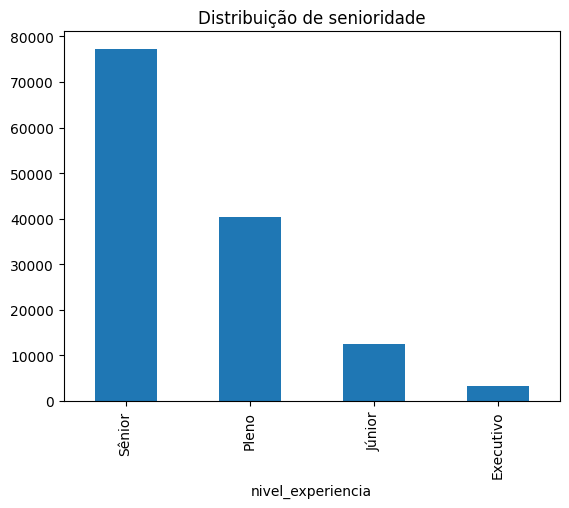

In [4]:
df_limpo['nivel_experiencia'].value_counts().plot(kind='bar', title='Distribuição de senioridade')

In [5]:
import seaborn as sns

<Axes: xlabel='nivel_experiencia', ylabel='salario_em_usd'>

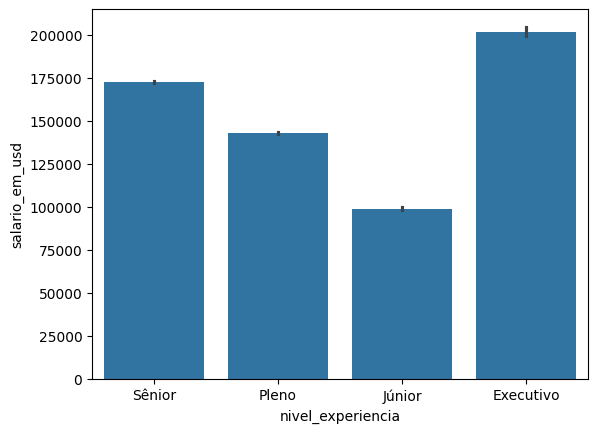

In [6]:
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd')

In [7]:
import matplotlib.pyplot as plt

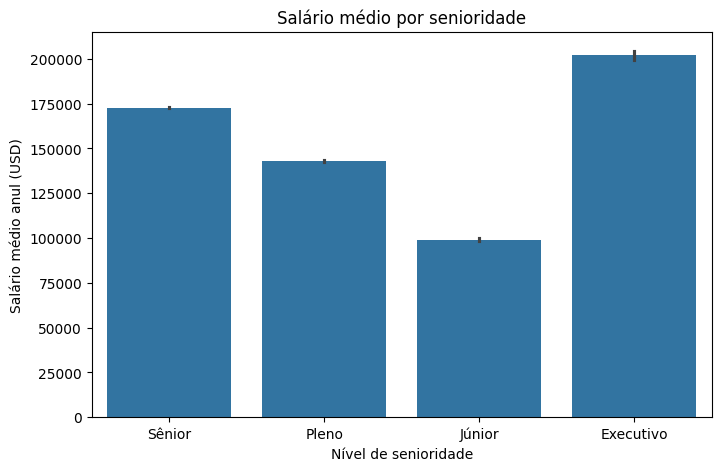

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd')
plt.title('Salário médio por senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário médio anul (USD)')
plt.show()

In [9]:
df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=False)

nivel_experiencia
Executivo    202027.667813
Sênior       172850.003845
Pleno        143041.323489
Júnior        99039.040264
Name: salario_em_usd, dtype: float64

In [10]:
ordem = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Júnior'], dtype='object', name='nivel_experiencia')

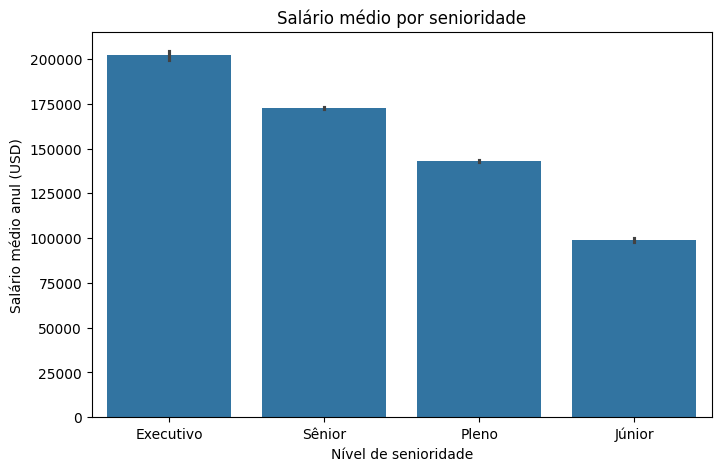

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd', order=ordem)
plt.title('Salário médio por senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário médio anul (USD)')
plt.show()

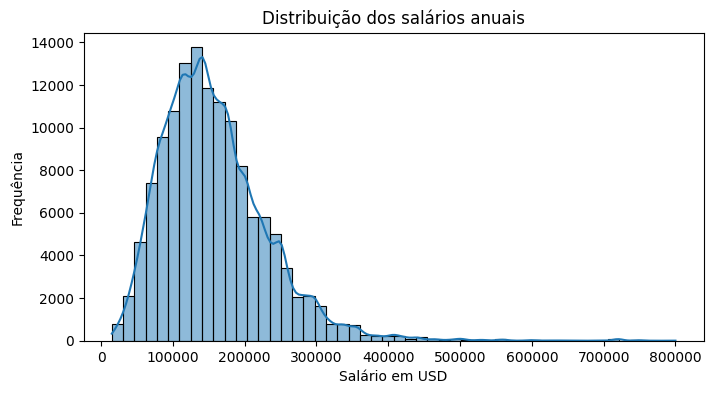

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo['salario_em_usd'], bins = 50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

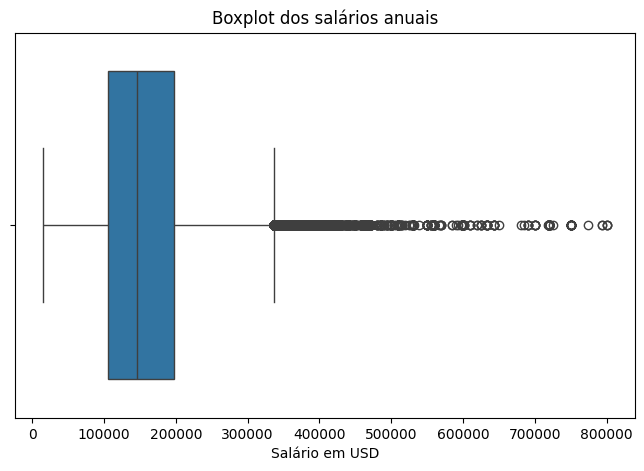

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['salario_em_usd'])
plt.title('Boxplot dos salários anuais')
plt.xlabel('Salário em USD')
plt.show()


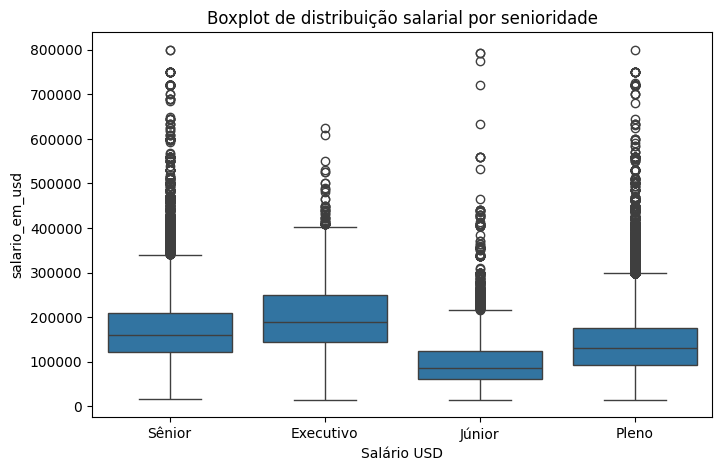

In [14]:
ordem_senioridade = {'Júnior', 'Pleno', 'Sênior', 'Executivo'}
plt.figure(figsize=(8,5))
sns.boxplot(x='nivel_experiencia', y='salario_em_usd', data=df_limpo, order=ordem_senioridade)
plt.title('Boxplot de distribuição salarial por senioridade')
plt.xlabel('Salário USD')
plt.show()

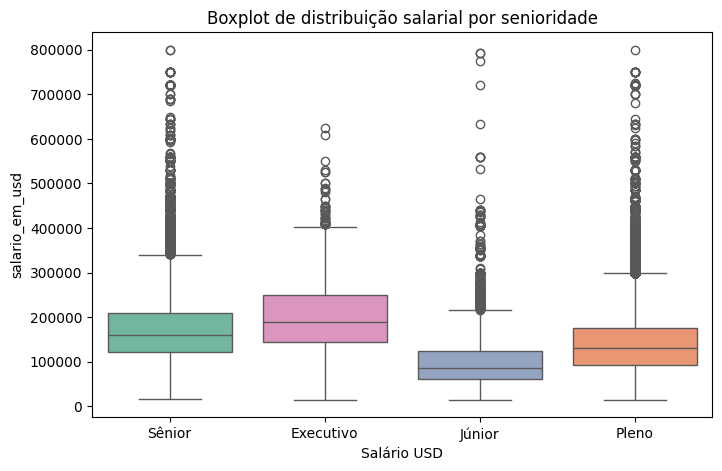

In [15]:
ordem_senioridade = {'Júnior', 'Pleno', 'Sênior', 'Executivo'}
plt.figure(figsize=(8,5))
sns.boxplot(x='nivel_experiencia', y='salario_em_usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='nivel_experiencia')
plt.title('Boxplot de distribuição salarial por senioridade')
plt.xlabel('Salário USD')
plt.show()

In [16]:
import plotly.express as px

In [17]:
df_media_senioridade = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    df_media_senioridade,
    x='nivel_experiencia',
    y='salario_em_usd',
    title='Média Salarial por Nível de Senioridade (USD) - Plotly',
    labels={
        'nivel_experiencia': 'Nível de Senioridade',
        'salario_em_usd': 'Salário Médio Anual (USD)'
    }
)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':df_media_senioridade['nivel_experiencia']})
fig

In [18]:
remoto_contagem = df_limpo['taxa_remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_emprego', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_emprego',
    values='quantidade',
    title='Proporção dos tipos de trabalho (Remoto, Presencial, Híbrido)'
)

fig

In [19]:
remoto_contagem = df_limpo['taxa_remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_emprego', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_emprego',
    values='quantidade',
    title='Proporção dos tipos de trabalho (Remoto, Presencial, Híbrido)',
    hole=0.5
)

fig

In [20]:
remoto_contagem = df_limpo['taxa_remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_emprego', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_emprego',
    values='quantidade',
    title='Proporção dos tipos de trabalho (Remoto, Presencial, Híbrido)',
    hole=0.5
)

fig.update_traces(textinfo='percent+label')
fig

In [21]:
df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']

df_media_salario_pais = df_data_scientist.groupby('local_empresa')['salario_em_usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    df_media_salario_pais,
    x='local_empresa',
    y='salario_em_usd',
    title='Salário Médio para Data Scientists por País (USD)',
)
fig.update_layout(xaxis_title_text='País da Empresa', yaxis_title_text='Salário Médio Anual (USD)')
fig

In [22]:
import pycountry

def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except:
    return None

df_limpo['residencia_iso3'] = df_limpo['residencia_empregado'].apply(iso2_to_iso3)

df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['salario_em_usd'].mean().reset_index()

fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='salario_em_usd',
                    color_continuous_scale='rdylgn',
                    title='Salário Médio para Data Scientist por País',
                    labels={'salario_em_usd': 'Salário Médio Anual (USD)', 'residencia_iso3': 'País'}
)

fig

In [25]:
df_limpo.to_csv('../data/processed/data-dashboard.csv', index=False)